In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the outcomes dataset
intakes_df = pd.read_csv("./data/Austin_Animal_Center_Intakes.csv", encoding='latin1')
outcomes_df = pd.read_csv("./data/Austin_Animal_Center_Outcomes.csv", encoding='latin1')



In [3]:
intakes_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
157623,A775309,Snowball,06/27/2018 06:16:00 PM,June 2018,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,2 years,Turkish Angora,White
157624,A760677,NaN,10/22/2017 01:58:00 PM,October 2017,Thomaswood Lane And Lenape Trail in Austin (TX),Stray,Normal,Cat,Intact Male,2 years,Domestic Shorthair Mix,Blue/White
157625,A811255,NaN,12/31/2019 08:10:00 AM,December 2019,12034 Research Blvd in Austin (TX),Stray,Injured,Cat,Intact Female,5 months,Domestic Shorthair,Black
157626,A763156,NaN,12/04/2017 11:42:00 AM,December 2017,1009 West Dittmar Road in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Miniature Poodle/Cocker Spaniel,White


In [4]:
outcomes_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
157561,A859974,*Lady Gaga,08/16/2022 11:42:00 AM,Aug 2022,06/21/2012,Adoption,NaN,Cat,Spayed Female,10 years,Devon Rex,White
157562,A856973,*Suede,06/11/2022 03:39:00 PM,Jun 2022,05/10/2021,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Medium Hair,Blue
157563,A852036,Queen,03/17/2022 05:22:00 PM,Mar 2022,12/08/2021,Adoption,NaN,Dog,Spayed Female,3 months,German Shepherd Mix,Brown/Black
157564,A852775,A852775,05/18/2022 02:13:00 PM,May 2022,01/31/2022,Adoption,Foster,Cat,Spayed Female,3 months,Domestic Medium Hair Mix,Tortie


In [9]:
# Merge the intakes and outcomes datasets on 'Animal ID' for analysis
merged_df = pd.merge(intakes_df, outcomes_df, on='Animal ID', suffixes=('_Intake', '_Outcome'))

# Handle missing values
# Drop rows with critical missing data in 'Outcome Type' or 'Intake Type'
merged_df = merged_df.dropna(subset=['Outcome Type', 'Intake Type'])


In [10]:
# Fill missing names and other non-critical fields with placeholders
merged_df['Name_Intake'].fillna('Unknown', inplace=True)
merged_df['Name_Outcome'].fillna('Unknown', inplace=True)
merged_df['Outcome Subtype'].fillna('Unknown', inplace=True)
merged_df['Sex upon Intake'].fillna('Unknown', inplace=True)
merged_df['Sex upon Outcome'].fillna('Unknown', inplace=True)

# Drop duplicate rows based on 'Animal ID' and 'DateTime_Intake' to keep only unique intakes
merged_df = merged_df.drop_duplicates(subset=['Animal ID', 'DateTime_Intake'])


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18344\2214083279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Name_Intake'].fillna('Unknown', inplace=True)
C:\Users\jaivb\AppData\Local\Temp\ipykernel_18344\2214083279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [11]:
outcome_encoder = LabelEncoder()
merged_df['Outcome Type'] = outcome_encoder.fit_transform(merged_df['Outcome Type'])

# Convert categorical features to numeric using Label Encoding
features_to_encode = ['Intake Type', 'Intake Condition', 'Animal Type_Intake', 'Sex upon Intake', 'Age upon Intake']
label_encoders = {}

for feature in features_to_encode:
    le = LabelEncoder()
    merged_df[feature] = le.fit_transform(merged_df[feature])
    label_encoders[feature] = le

In [12]:
# Convert entire DataFrame to numeric (for correlation compatibility)
numeric_df = merged_df[features_to_encode + ['Outcome Type']].apply(pd.to_numeric, errors='coerce')

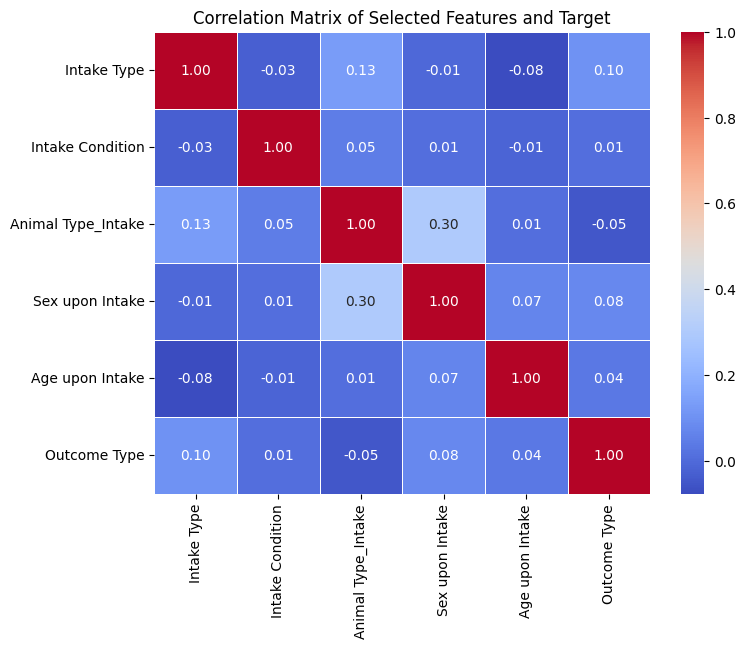

In [13]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features and Target')
plt.show()


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18344\463628110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Outcome Type', palette='Set2')


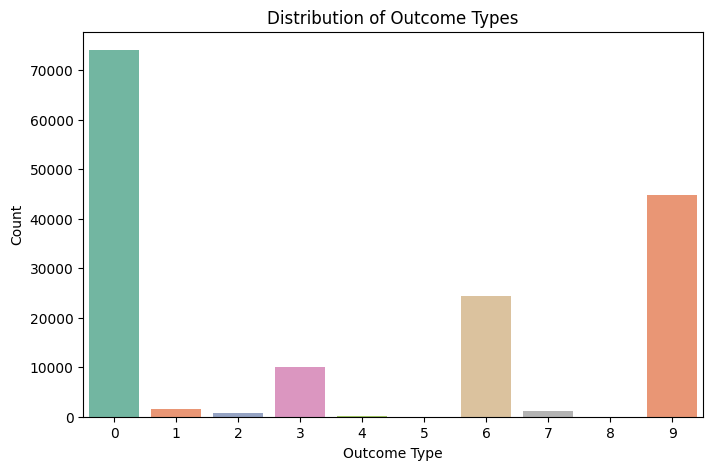

In [20]:
# Distribution of Outcome Types
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='Outcome Type', palette='Set2')
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.show()

C:\Users\jaivb\AppData\Local\Temp\ipykernel_18344\28561048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Animal Type_Intake', palette='husl')


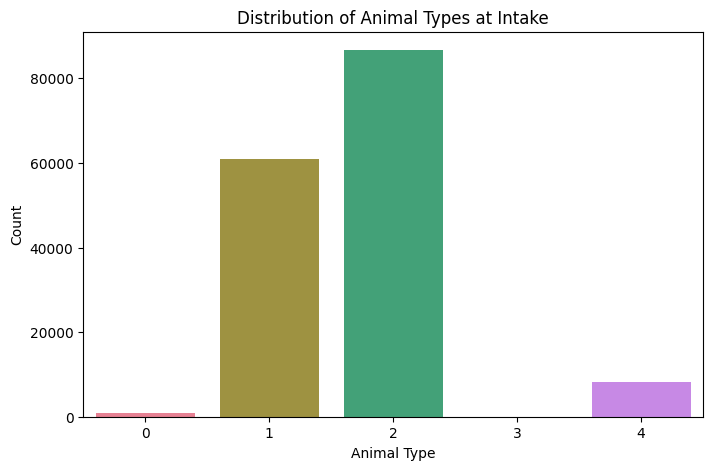

In [21]:
# Distribution of Animal Type Intake
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='Animal Type_Intake', palette='husl')
plt.title('Distribution of Animal Types at Intake')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


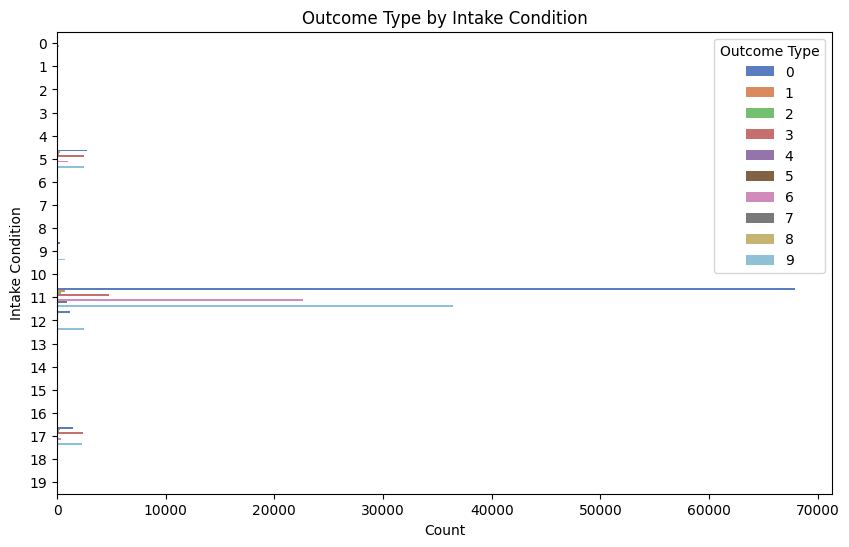

In [22]:
# Intake Condition by Outcome Type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, y='Intake Condition', hue='Outcome Type', palette='muted')
plt.title('Outcome Type by Intake Condition')
plt.xlabel('Count')
plt.ylabel('Intake Condition')
plt.legend(title='Outcome Type')
plt.show()

Feature selection justification statement
- Selected features are based on their interpretability and correlation with the target 'Outcome Type'.
- 'Intake Type', 'Intake Condition', and 'Animal Type_Intake' show significant correlations, indicating their influence on the outcome.
- 'Sex upon Intake' and 'Age upon Intake' are included due to their relevance in determining animal health and adoptability, making them critical predictive factors.


In [14]:
# Prepare data for predictive modeling
# Define X (features) and y (target)
X = merged_df[features_to_encode]
y = merged_df['Outcome Type']  # Already encoded


In [15]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Make predictions
y_pred = clf.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

c:\Users\jaivb\OneDrive\Desktop\Projects_in_machine_learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaivb\OneDrive\Desktop\Projects_in_machine_learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaivb\OneDrive\Desktop\Projects_in_machine_learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [19]:
print(f'Model Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Model Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.81      0.71     22321
           1       0.19      0.01      0.02       450
           2       0.25      0.01      0.02       231
           3       0.77      0.64      0.70      2976
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         1
           6       0.57      0.56      0.56      7227
           7       0.09      0.01      0.02       337
           8       0.00      0.00      0.00         2
           9       0.62      0.41      0.49     13439

    accuracy                           0.63     47006
   macro avg       0.31      0.24      0.25     47006
weighted avg       0.62      0.63      0.61     47006

